
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [73]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Delft, Netherlands

In [74]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 0.1 # 6 minutes hour of simulation
params.nP = 10 # reuqests (and passengers)
params.nV = 10 # vehicles


## Parameters for ExMAS

In [75]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.3
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_pax' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [76]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

15-02-23 10:30:00-INFO-Initializing pairwise trip shareability between 10 and 10 trips.
15-02-23 10:30:00-INFO-creating combinations
15-02-23 10:30:00-INFO-90	 nR*(nR-1)
15-02-23 10:30:00-INFO-Reduction of feasible pairs by 94.44%
15-02-23 10:30:00-INFO-Degree 2 	Completed
15-02-23 10:30:00-INFO-trips to extend at degree 2 : 14
15-02-23 10:30:00-INFO-At degree 2 feasible extensions found out of 0 searched
15-02-23 10:30:00-INFO-Degree 3 	Completed
15-02-23 10:30:00-INFO-No more trips to exted at degree 3


In [77]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

15-02-23 10:30:01-INFO-Matching 10 trips to 24 rides in order to min u_pax
15-02-23 10:30:01-INFO-Problem solution: Optimal. 
Total costs for single trips:             45 
reduced by matching to:                   41


In [78]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],5.03800,272,1,[5.038],"[0, 272]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1448535764, 44773458]","[None, 0, 0]",node time req_id od 0 ...,272,2.72,4.08600,0.81720,3.26880
1,[1],7.71450,417,1,[7.7145],"[11, 417]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1565882142, 44851133]","[None, 1, 1]",node time req_id od 0 ...,417,4.17,6.25500,1.25100,5.00400
2,[2],4.95800,268,1,[4.957999999999999],"[14, 268]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1448535888, 3201816977]","[None, 2, 2]",node time req_id od 0 ...,268,2.68,4.02000,0.80400,3.21600
3,[3],0.84450,45,1,[0.8445],"[62, 45]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 5374808913, 643586570]","[None, 3, 3]",node time req_id od 0 ...,45,0.45,0.68700,0.13740,0.54960
4,[4],2.87800,155,1,[2.878],"[67, 155]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 30016605, 44766586]","[None, 4, 4]",node time req_id od 0 NaN...,155,1.55,2.33550,0.46710,1.86840
5,[5],5.27250,285,1,[5.272500000000001],"[159, 285]",[5],[5],1,5,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1,"[None, 4810005054, 5714816833]","[None, 5, 5]",node time req_id od 0 ...,285,2.85,4.27500,0.85500,3.42000
6,[6],5.62550,304,1,[5.6255],"[170, 304]",[6],[6],1,6,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,"[None, 44875060, 4655063484]","[None, 6, 6]",node time req_id od 0 ...,304,3.04,4.56150,0.91230,3.64920
7,[7],3.86000,208,1,[3.8600000000000003],"[216, 208]",[7],[7],1,7,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,"[None, 44865755, 4349049067]","[None, 7, 7]",node time req_id od 0 ...,208,2.08,3.13200,0.62640,2.50560
8,[8],5.63000,304,1,[5.63],"[249, 304]",[8],[8],1,8,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0,"[None, 44739609, 44770871]","[None, 8, 8]",node time req_id od 0 NaN...,304,3.04,4.56600,0.91320,3.65280
9,[9],3.27900,177,1,[3.279],"[322, 177]",[9],[9],1,9,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44813101, 44785094]","[None, 9, 9]",node time req_id od 0 NaN...,177,1.77,2.65950,0.53190,2.12760


In [79]:
params.kpi = 1

In [80]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

15-02-23 10:30:02-INFO-Matching 10 trips to 24 rides in order to min u_pax
15-02-23 10:30:02-INFO-Problem solution: Optimal. 
Total costs for single trips:             45 
reduced by matching to:                   41
15-02-23 10:30:03-WARNING-Setting up 0.1h simulation at 2023-02-15 10:27:03 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:30:03-CRITICAL-this is request 0 with [0, 10, 11, 12, 19] available rides.
15-02-23 10:30:03-CRITICAL-ride 0 available [1]
15-02-23 10:30:03-CRITICAL-ride 10 available [1, 0]
15-02-23 10:30:03-CRITICAL-ride 11 available [1, 0]
15-02-23 10:30:03-CRITICAL-ride 12 available [1, 0]
15-02-23 10:30:03-CRITICAL-ride 19 available [0, 1]
15-02-23 10:30:03-CRITICAL-this is reuqest 0 with [0, 10, 11, 12, 19] still available rides.
15-02-23 10:30:03-CRITICAL-vehicle 1 has 5 choices
15-02-23 10:30:03-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 10 of degree 2, with travellers [0, 1].
0.5
15-02-23 10:30:03-CRITICAL-this is re

In [81]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,0.0,15.0,0,269.0,0,...,0,0,6398.0,314.0,0,503.0,344.0,5237.0,5.768,3.65280
2,2.0,0.0,False,0,0,14.0,15.0,0,68.0,0,...,0,0,6930.0,318.0,0,154.0,143.0,6315.0,3.138,2.63592
3,2.0,0.0,False,0,0,170.0,15.0,0,66.0,0,...,0,0,6736.0,256.0,0,256.0,141.0,6083.0,5.129,4.30836
4,1.0,0.0,False,0,0,159.0,15.0,0,20.0,0,...,0,0,6925.0,285.0,0,125.0,65.0,6450.0,2.850,3.42000
5,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000
6,0.0,0.0,False,0,0,322.0,0.0,0,0.0,0,...,0,0,7237.0,0.0,0,0.0,0.0,7237.0,0.000,0.00000
7,1.0,0.0,False,0,0,67.0,15.0,0,7.0,0,...,0,0,7272.0,155.0,0,13.0,52.0,7052.0,1.557,1.86840
8,2.0,0.0,False,0,0,11.0,15.0,0,241.0,0,...,0,0,6707.0,384.0,0,141.0,316.0,5866.0,5.943,4.99212
9,0.0,0.0,False,0,0,216.0,0.0,0,0.0,0,...,0,0,7343.0,0.0,0,0.0,0.0,7343.0,0.000,0.00000


In [82]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.6528,
 2.63592,
 4.3083599999999995,
 3.4200000000000004,
 0.0,
 0.0,
 1.8683999999999998,
 4.99212,
 0.0,
 0.0]

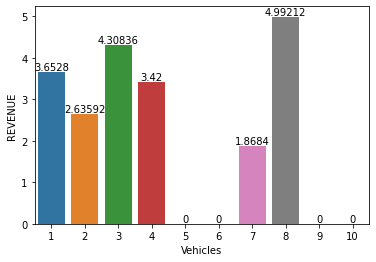

In [83]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

# Strategy 2: 

# params.kpi = 2 (Solo ride-hailing) 


In [53]:
params.kpi = 2

In [54]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

15-02-23 10:26:08-INFO-Initializing pairwise trip shareability between 10 and 10 trips.
15-02-23 10:26:08-INFO-creating combinations
15-02-23 10:26:08-INFO-90	 nR*(nR-1)
15-02-23 10:26:08-INFO-Reduction of feasible pairs by 98.89%
15-02-23 10:26:08-INFO-Degree 2 	Completed
15-02-23 10:26:08-INFO-trips to extend at degree 2 : 8
15-02-23 10:26:08-INFO-At degree 2 feasible extensions found out of 0 searched
15-02-23 10:26:08-INFO-Degree 3 	Completed
15-02-23 10:26:08-INFO-No more trips to exted at degree 3


In [55]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

15-02-23 10:26:09-INFO-Matching 10 trips to 18 rides in order to min u_pax
15-02-23 10:26:09-INFO-Problem solution: Optimal. 
Total costs for single trips:             41 
reduced by matching to:                   39
15-02-23 10:26:09-WARNING-Setting up 0.1h simulation at 2023-02-15 10:19:13 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:26:09-CRITICAL-this is request 0 with [0, 10, 11, 12] available rides.
15-02-23 10:26:09-CRITICAL-ride 0 available [1]
15-02-23 10:26:09-CRITICAL-ride 10 available [1, 0]
15-02-23 10:26:09-CRITICAL-ride 11 available [1, 0]
15-02-23 10:26:09-CRITICAL-ride 12 available [0, 1]
15-02-23 10:26:09-CRITICAL-this is reuqest 0 with [0, 10, 11, 12] still available rides.
15-02-23 10:26:09-CRITICAL-vehicle 1 has 4 choices
15-02-23 10:26:09-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 0 of degree 1, with travellers [0].
0.5
15-02-23 10:26:09-CRITICAL-this is request 1 with [1, 12] available rides.
15-02-23 10:26:09-CRITICAL

In [56]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,0.0,15.0,0,38.0,0,...,0,0,6480.0,431.0,0,535.0,113.0,5401.0,7.141,5.99844
2,1.0,0.0,False,0,0,100.0,15.0,0,20.0,0,...,0,0,7344.0,35.0,0,15.0,65.0,7229.0,0.352,0.42240
3,0.0,0.0,False,0,0,67.0,0.0,0,0.0,0,...,0,0,7492.0,0.0,0,0.0,0.0,7492.0,0.000,0.00000
4,0.0,0.0,False,0,0,265.0,0.0,0,0.0,0,...,0,0,7294.0,0.0,0,0.0,0.0,7294.0,0.000,0.00000
5,1.0,0.0,False,0,0,70.0,15.0,0,20.0,0,...,0,0,7109.0,216.0,0,99.0,65.0,6729.0,2.167,2.60040
6,1.0,0.0,False,0,0,181.0,15.0,0,20.0,0,...,0,0,6979.0,245.0,0,89.0,65.0,6580.0,2.456,2.94720
7,2.0,0.0,False,0,0,171.0,15.0,0,48.0,0,...,0,0,6639.0,507.0,0,147.0,95.0,5890.0,6.119,4.59720
8,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000
9,1.0,0.0,False,0,0,116.0,15.0,0,20.0,0,...,0,0,7323.0,15.0,0,40.0,65.0,7203.0,0.154,0.18480


In [57]:
sim.res[0].veh_exp['REVENUE'].to_list()

[5.99844,
 0.4224,
 0.0,
 0.0,
 2.6003999999999996,
 2.9472,
 4.5972,
 0.0,
 0.1848,
 3.55068]

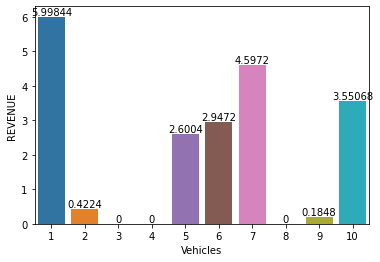

In [58]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

# Strategy 3: 
# params.kpi = 3 (Nearest pickup ride-pooling)


In [59]:
params.kpi = 3

In [60]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

15-02-23 10:26:34-INFO-Initializing pairwise trip shareability between 10 and 10 trips.
15-02-23 10:26:34-INFO-creating combinations
15-02-23 10:26:34-INFO-90	 nR*(nR-1)
15-02-23 10:26:34-INFO-Reduction of feasible pairs by 98.89%
15-02-23 10:26:34-INFO-Degree 2 	Completed
15-02-23 10:26:34-INFO-trips to extend at degree 2 : 8
15-02-23 10:26:34-INFO-At degree 2 feasible extensions found out of 0 searched
15-02-23 10:26:34-INFO-Degree 3 	Completed
15-02-23 10:26:34-INFO-No more trips to exted at degree 3


In [61]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

15-02-23 10:26:34-INFO-Matching 10 trips to 18 rides in order to min u_pax
15-02-23 10:26:34-INFO-Problem solution: Optimal. 
Total costs for single trips:             41 
reduced by matching to:                   39
15-02-23 10:26:34-WARNING-Setting up 0.1h simulation at 2023-02-15 10:19:13 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:26:34-CRITICAL-this is request 0 with [0, 10, 11, 12] available rides.
15-02-23 10:26:34-CRITICAL-ride 0 available [1]
15-02-23 10:26:34-CRITICAL-ride 10 available [1, 0]
15-02-23 10:26:34-CRITICAL-ride 11 available [1, 0]
15-02-23 10:26:34-CRITICAL-ride 12 available [0, 1]
15-02-23 10:26:34-CRITICAL-this is reuqest 0 with [0, 10, 11, 12] still available rides.
hell
15-02-23 10:26:34-CRITICAL-vehicle 1 has 4 choices
15-02-23 10:26:34-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 12 of degree 2, with travellers [1, 0].
0.5
15-02-23 10:26:34-CRITICAL-this is request 1 with [1, 12] available rides.
15-02-23 10:26:34

In [62]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,0.0,15.0,0,38.0,0,...,0,0,6480.0,431.0,0,535.0,113.0,5401.0,7.141,5.99844
2,1.0,0.0,False,0,0,100.0,15.0,0,20.0,0,...,0,0,7344.0,35.0,0,15.0,65.0,7229.0,0.352,0.42240
3,0.0,0.0,False,0,0,67.0,0.0,0,0.0,0,...,0,0,7492.0,0.0,0,0.0,0.0,7492.0,0.000,0.00000
4,0.0,0.0,False,0,0,265.0,0.0,0,0.0,0,...,0,0,7294.0,0.0,0,0.0,0.0,7294.0,0.000,0.00000
5,1.0,0.0,False,0,0,181.0,15.0,0,20.0,0,...,0,0,6979.0,245.0,0,89.0,65.0,6580.0,2.456,2.94720
6,2.0,0.0,False,0,0,82.0,0.0,0,35.0,0,...,0,0,6899.0,205.0,0,278.0,95.0,6321.0,4.227,3.55068
7,1.0,0.0,False,0,0,70.0,15.0,0,20.0,0,...,0,0,7109.0,216.0,0,99.0,65.0,6729.0,2.167,2.60040
8,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000
9,1.0,0.0,False,0,0,116.0,15.0,0,20.0,0,...,0,0,7323.0,15.0,0,40.0,65.0,7203.0,0.154,0.18480


In [63]:
sim.res[0].veh_exp['REVENUE'].to_list()

[5.99844,
 0.4224,
 0.0,
 0.0,
 2.9472,
 3.55068,
 2.6003999999999996,
 0.0,
 0.1848,
 4.5972]

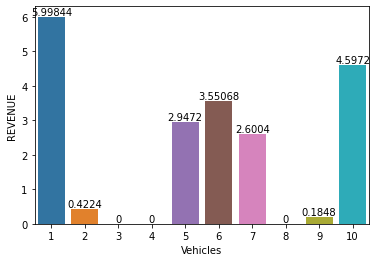

In [64]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

# All in one Simulation  

In [91]:
responses = []
for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate
    sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index
    sim.res[0].veh_exp['ds'] = f"{i}"
    responses.append(sim.res[0].veh_exp)
    

15-02-23 10:50:34-WARNING-Setting up 0.1h simulation at 2023-02-15 10:27:03 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:50:35-CRITICAL-this is request 0 with [0, 10, 11, 12, 19] available rides.
15-02-23 10:50:35-CRITICAL-ride 0 available [1]
15-02-23 10:50:35-CRITICAL-ride 10 available [1, 0]
15-02-23 10:50:35-CRITICAL-ride 11 available [1, 0]
15-02-23 10:50:35-CRITICAL-ride 12 available [1, 0]
15-02-23 10:50:35-CRITICAL-ride 19 available [0, 1]
15-02-23 10:50:35-CRITICAL-this is reuqest 0 with [0, 10, 11, 12, 19] still available rides.
15-02-23 10:50:35-CRITICAL-vehicle 1 has 5 choices
15-02-23 10:50:35-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 10 of degree 2, with travellers [0, 1].
0.5
15-02-23 10:50:35-CRITICAL-this is request 1 with [1, 10, 19, 20] available rides.
15-02-23 10:50:35-CRITICAL-ride 1 available [1]
15-02-23 10:50:35-CRITICAL-ride 10 not available [2, 1]
15-02-23 10:50:35-CRITICAL-ride 19 not available [1, 2]
15-02-23 10

<AxesSubplot:xlabel='Vehicles', ylabel='REVENUE'>

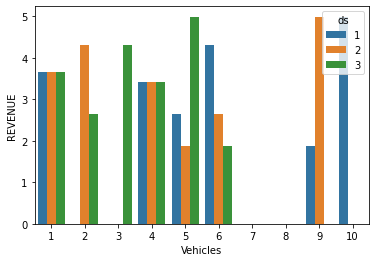

In [92]:
import seaborn as sns
datasets = pd.concat([*responses])

sns.barplot(x='Vehicles', y='REVENUE',hue='ds',  data=datasets)

In [93]:
sim.res[0].all_kpi # All driver revenue 

20.8776

In [88]:
sim.params.kpi





3

In [89]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.6528,
 0.0,
 4.99212,
 3.4200000000000004,
 4.3083599999999995,
 0.0,
 0.0,
 0.0,
 2.63592,
 1.8683999999999998]

In [42]:

list(sim.vehs.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
sim.res[0].all_kpi

20.30112

## Plotting Graph of driver vs revenue

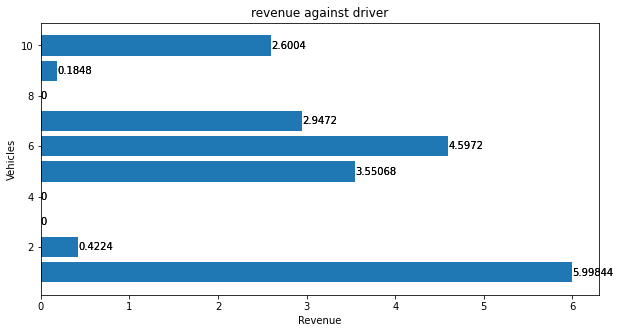

In [44]:
# plot graph of driver revenue
vehicles  = list(sim.res[0].veh_exp.index.to_list())
revenues = sim.res[0].veh_exp['REVENUE'].to_list()
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.barh(vehicles, revenues)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)


plt.xlabel("Revenue")
plt.ylabel("Vehicles")
plt.title("revenue against driver")
plt.show()

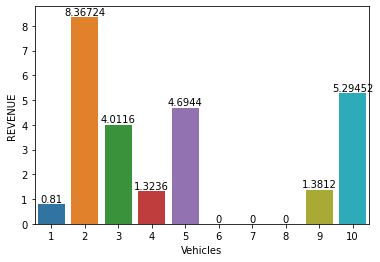

In [48]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

In [69]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,rides,sim_schedule
pax,,,,,,,,,,,,,,,,
0,0,1570982917,44828189,2023-02-15 10:19:13,NaN,0 days 01:04:08,2023-02-15 11:23:21,NaN,True,NaN,3848,0,12,0,"[0, 10, 11, 12]",node time req_id od 0 ...
1,1,44753489,1519889798,2023-02-15 10:19:31,NaN,0 days 00:54:53,2023-02-15 11:14:24,NaN,True,NaN,3293,0,12,0,"[1, 12]",node time req_id od 0 ...


In [70]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,44828189,driverEvent.ENDS_SHIFT,0,86400,0,NaN
2,1620840079,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [71]:
inData.passengers.head(2)

,pos,event,platforms
pax,,,
0,1570982917,NaN,[0]
1,44753489,NaN,[0]
